In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_AG_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148,72.0,35,0.0,33.6,0.627,50.0
1,1.0,85,66.0,29,NaN,26.6,0.351,NaN
2,8.0,183,64.0,0,0.0,23.3,0.672,32.0
3,1.0,89,66.0,23,94.0,NaN,0.167,NaN
4,0.0,137,40.0,35,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,NaN,101,NaN,48,180.0,32.9,0.171,63.0
764,2.0,122,70.0,27,0.0,36.8,0.340,27.0
765,5.0,121,72.0,23,112.0,26.2,0.245,30.0
766,1.0,126,60.0,0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	19
int64		column 2	0
float64		column 3	19
int64		column 4	0
float64		column 5	95
float64		column 6	57
float64		column 7	0
float64		column 8	114


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,749.000000,768.000000,749.000000,768.000000,673.000000,711.000000,768.000000,654.000000
mean,3.821095,120.894531,69.078772,20.536458,77.583952,32.257665,0.471876,33.217125
std,3.339127,31.972618,19.314743,15.952218,112.663912,7.751824,0.331329,11.700916
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,23.000000,32.400000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,126.000000,36.800000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,72.000000


<AxesSubplot:>

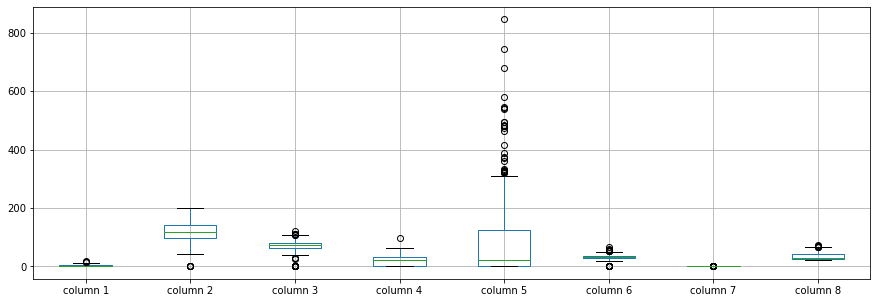

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.821095
column 2    120.894531
column 3     69.078772
column 4     20.536458
column 5     77.583952
column 6     32.257665
column 7      0.471876
column 8     33.217125
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.128608,0.143186,-0.087446,-0.100519,0.010168,-0.023546,0.528313
column 2,0.128608,1.000000,0.155500,0.057328,0.308816,0.224314,0.137337,0.267529
column 3,0.143186,0.155500,1.000000,0.209250,0.087030,0.285171,0.035243,0.225830
column 4,-0.087446,0.057328,0.209250,1.000000,0.420348,0.377107,0.183928,-0.110332
column 5,-0.100519,0.308816,0.087030,0.420348,1.000000,0.195018,0.193102,-0.032455
column 6,0.010168,0.224314,0.285171,0.377107,0.195018,1.000000,0.136912,0.065537
column 7,-0.023546,0.137337,0.035243,0.183928,0.193102,0.136912,1.000000,0.018049
column 8,0.528313,0.267529,0.225830,-0.110332,-0.032455,0.065537,0.018049,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+19,8+19+19,8+19+19+19,8+19+19+19+19,8+19+19+19+19+19,8+19+19+19+19,8+19+19+19,8+19+19,8+19,8], vae_layer = False, seed = 19)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 398.36187744140625
Epoch: 1 , loss: 398.6299794514974
Epoch: 2 , loss: 400.01898765563965
Epoch: 3 , loss: 398.9973449707031
Epoch: 4 , loss: 398.0762710571289
Epoch: 5 , loss: 398.20528348286945
Epoch: 6 , loss: 397.8600311279297
Epoch: 7 , loss: 395.904572168986
Epoch: 8 , loss: 392.32446734110516
Epoch: 9 , loss: 383.6189835866292
Epoch: 10 , loss: 369.3089892069499
Epoch: 11 , loss: 361.6289800008138
Epoch: 12 , loss: 352.7711003621419
Epoch: 13 , loss: 345.9720319112142
Epoch: 14 , loss: 340.82789357503253
Epoch: 15 , loss: 334.6230761210124
Epoch: 16 , loss: 331.91641998291016
Epoch: 17 , loss: 324.7494265238444
Epoch: 18 , loss: 320.9120616912842
Epoch: 19 , loss: 318.86927858988446
Epoch: 20 , loss: 309.6896794637044
Epoch: 21 , loss: 303.82836596171063
Epoch: 22 , loss: 306.3902060190837
Epoch: 23 , loss: 301.91254965464276
Epoch: 24 , loss: 298.06303183237713
Epoch: 25 , loss: 294.935182571411

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,0,0.000000,0,0.000000,0.000000,0.0,0.000000
1,0.000000,0,0.000000,0,0.185812,0.000000,0.0,-30.790300
2,0.000000,0,0.000000,0,0.000000,0.000000,0.0,0.000000
3,0.000000,0,0.000000,0,0.000000,-17.674348,0.0,-10.419826
4,0.000000,0,0.000000,0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...
763,-8.711366,0,-58.919571,0,0.000000,0.000000,0.0,0.000000
764,0.000000,0,0.000000,0,0.000000,0.000000,0.0,0.000000
765,0.000000,0,0.000000,0,0.000000,0.000000,0.0,0.000000
766,0.000000,0,0.000000,0,0.000000,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1460.215041493299, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.25278209420097253

In [18]:
new_df.iloc[66,:]

column 1      0.000000
column 2    109.000000
column 3     88.000000
column 4     30.000000
column 5      0.000000
column 6     14.455547
column 7      0.855000
column 8     14.844440
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.000000,148,72.000000,35,0.000000,33.600000,0.627,50.000000
1,1.000000,85,66.000000,29,0.185812,26.600000,0.351,0.209700
2,8.000000,183,64.000000,0,0.000000,23.300000,0.672,32.000000
3,1.000000,89,66.000000,23,94.000000,10.425652,0.167,10.580174
4,0.000000,137,40.000000,35,168.000000,43.100000,2.288,33.000000
...,...,...,...,...,...,...,...,...
763,1.288634,101,17.080429,48,180.000000,32.900000,0.171,63.000000
764,2.000000,122,70.000000,27,0.000000,36.800000,0.340,27.000000
765,5.000000,121,72.000000,23,112.000000,26.200000,0.245,30.000000
766,1.000000,126,60.000000,0,0.000000,30.100000,0.349,47.000000


In [20]:
imputations[-1].to_excel("PID_AG_5.xlsx", index=False, header=False)